In [2]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'c:\\Users\\nmorand\\OneDrive - SIMONIN SAS\\Projet_Controle_Qualite'

In [4]:
images = glob.glob('*.jpeg')
images

['img_binary.jpeg', 'img_gray_cropped.jpeg', 'Meleze_35x145_mm.jpeg']

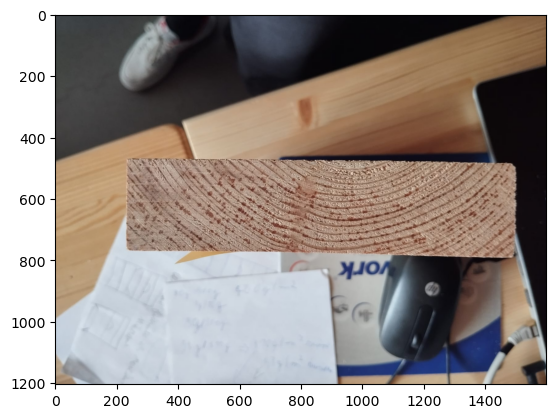

In [7]:
# Open the first image with OpenCV
img = cv2.imread(images[2])
# Convert the image from BGR to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display the image using matplotlib
plt.imshow(img)

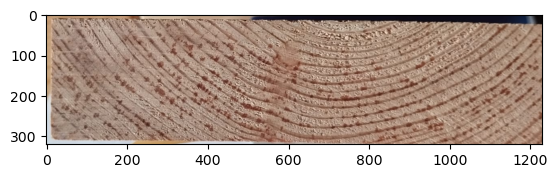

In [8]:
plt.imshow(img[460:780,220:1450])

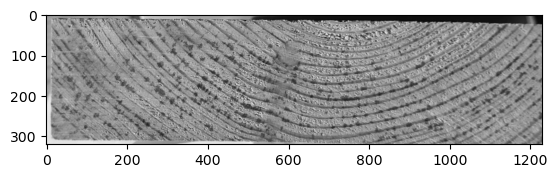

In [9]:
# Plot the image in grayscale
plt.imshow(cv2.cvtColor(img[460:780,220:1450], cv2.COLOR_BGR2GRAY), cmap='gray')

In [10]:
img_gray_cropped = cv2.cvtColor(img[460:780,220:1450], cv2.COLOR_BGR2GRAY)

cv2.imwrite('img_gray_cropped.jpeg', img_gray_cropped)

True

In [11]:
threshold = 150
# Apply binary thresholding to the grayscale image
_, img_binary = cv2.threshold(img_gray_cropped, threshold, 255, cv2.THRESH_BINARY_INV)

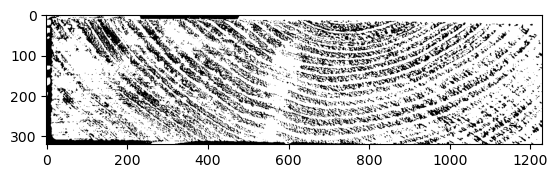

In [12]:
plt.imshow(img_binary, cmap='gray')

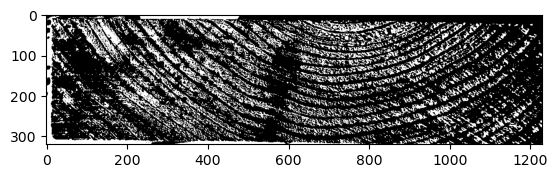

In [13]:
# Invert the binary image
img_binary = cv2.bitwise_not(img_binary)
plt.imshow(img_binary, cmap='gray')

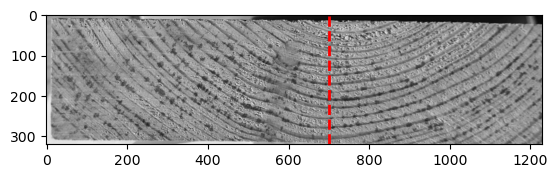

In [26]:
x = 700
# Plot a red line on the image gray at x
plt.axvline(x=x, color='red', linestyle='--', linewidth=2)
plt.imshow(img_gray_cropped, cmap='gray')
# Plot a red line on the image binary at x

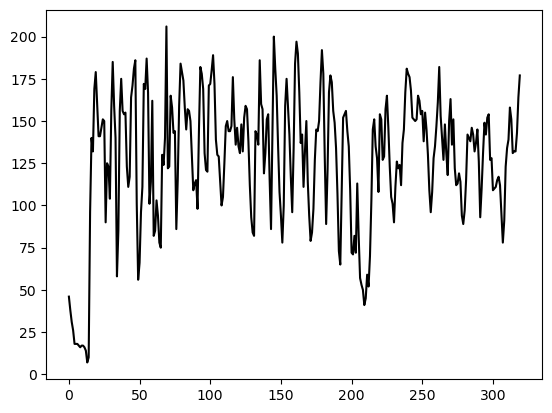

In [27]:
# Plot a graph of the color at x= 700
cut = img_gray_cropped[:,700]
plt.plot(cut, color='black')

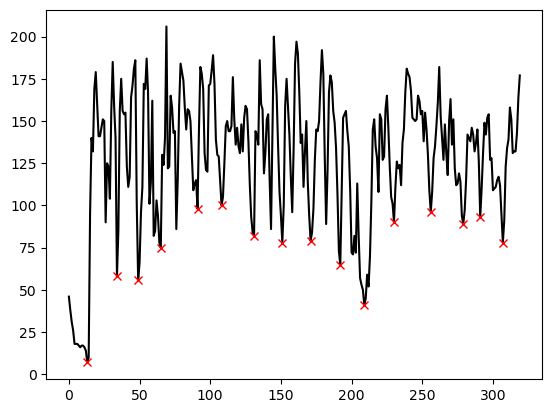

In [74]:
from scipy.signal import find_peaks
# Find peaks in the cut signal
peaks, _ = find_peaks(-cut, height=150, distance=12)
# peaks, _ = find_peaks(cut, height=150, distance=4)
plt.plot(cut, color='black')
plt.plot(peaks, cut[peaks], "x", color='red')


In [78]:
# Get the distance between the peaks
distances = np.diff(peaks)
print(distances)

[21 15 16 26 17 23 20 20 21 17 21 26 23 12 16]


In [79]:
len(distances)

15

(array([1., 0., 0., 0., 1., 2., 0., 2., 0., 0., 0., 2., 3., 0., 0., 2., 0.,
        0., 0., 2.]),
 array([12. , 12.7, 13.4, 14.1, 14.8, 15.5, 16.2, 16.9, 17.6, 18.3, 19. ,
        19.7, 20.4, 21.1, 21.8, 22.5, 23.2, 23.9, 24.6, 25.3, 26. ]),
 <BarContainer object of 20 artists>)

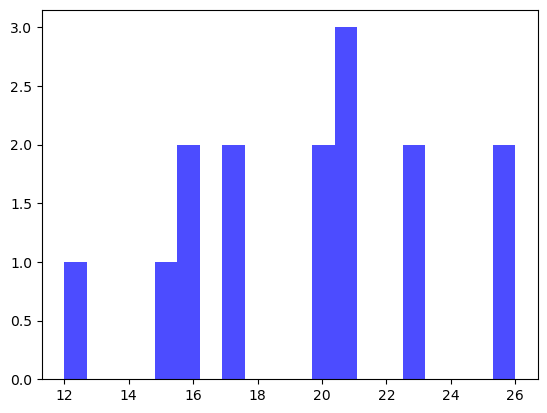

In [80]:
# Plot the distribution of distances between peaks every 1 pixel
plt.hist(distances, bins=20, color='blue', alpha=0.7)

In [81]:
# Moyenne et écart type de la distribution des distances entre les pics
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print("Mean distance:", mean_distance)
print("Standard deviation of distance:", std_distance)

Mean distance: 19.6
Standard deviation of distance: 3.9123735336323224


In [84]:
# eCHELLE 
print(img_gray_cropped.shape)
nb_pixels_par_mm = 1230 / 145
nb_pixels_par_mm

(320, 1230)


8.482758620689655

In [85]:
print('Distance moyenne entre 2 cernes:', mean_distance, 'pixels')
print('Distance moyenne entre 2 cernes:', mean_distance / nb_pixels_par_mm, 'mm')

Distance moyenne entre 2 cernes: 19.6 pixels
Distance moyenne entre 2 cernes: 2.3105691056910573 mm
